### OpenCV


OpenCV是计算机视觉中经典的专用库，其支持多语言、跨平台，功能强大。

OpenCV-Python为OpenCV提供了Python接口，使得使用者在Python中能够调用C/C++，在保证易读性和运行效率的前提下，实现所需的功能。

OpenCV-Python Tutorials官方文档：https://docs.opencv.org/4.1.2/d6/d00/tutorial_py_root.html

----

#### OpenCV的安装

pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple

查看是否安装成功

---

### OpenCV基础操作

### 三种常见的色彩空间：

- RGB
- GRAY
- HSV

![avatar](./00_img/rhg.png)

#### RGB

![avatar](./00_img/rgb.png)


RGB常见颜色表

![avatar](./00_img/rgb1.png)

### HSV

HSV即Hue(色调),Saturation(饱和度)和Value(亮度)三个channel

![avatar](./00_img/hsv.png)

---

In [96]:
for i in dir(cv2):
    if "COLOR_BGR" in i:
        print(i)

COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
COLOR_BGR2YCrCb
COLOR_BGR2YUV
COLOR_BGR2YUV_I420
COLOR_BGR2YUV_IYUV
COLOR_BGR2YUV_YV12
COLOR_BGR5552BGR
COLOR_BGR5552BGRA
COLOR_BGR5552GRAY
COLOR_BGR5552RGB
COLOR_BGR5552RGBA
COLOR_BGR5652BGR
COLOR_BGR5652BGRA
COLOR_BGR5652GRAY
COLOR_BGR5652RGB
COLOR_BGR5652RGBA
COLOR_BGRA2BGR
COLOR_BGRA2BGR555
COLOR_BGRA2BGR565
COLOR_BGRA2GRAY
COLOR_BGRA2RGB
COLOR_BGRA2RGBA
COLOR_BGRA2YUV_I420
COLOR_BGRA2YUV_IYUV
COLOR_BGRA2YUV_YV12


读取图片并显示图片

---

### 对视频操作

读取视频并显示

将视频处理为黑白视频

将视频保存为150张图片

----

### 使用Opencv绘制几何图型

- cv2.line()
- cv2.rectangle()
- cv2.circle()
- cv2.putText()

---

### OpenCV事件相应-创建可以绘制图像的画板

In [98]:
import cv2

for i in dir(cv2):
    if "EVENT" in i:
        print(i)

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


---

### OpenCV 实现一个调色板

---

### OpenCV 核心操作 -  对图像的操作

#### 获取图像属性

In [104]:
import cv2

img = cv2.imread("./00_img/cv2.png")

print(img.shape)  # 获取图像的形状

print(img.size) # 获取图像的像素数目

print(img.dtype)  # 获取图像的数据类型


(217, 212, 3)
138012
uint8


#### 对图像通道操作

#### 图像相加运算

$g (x) = (1 − α) * f_0 (x) + α * f_1 (x)$

现在我们把两幅图混合在一起。第一幅图的权重是 0.7，第二幅图的权重是 0.3。


函数 cv2.addWeighted() 可以按下面的公式对图片进行混合操作。

$dst = α · img1 + β · img2 + γ$ 这里 γ 的取值为 0。

#### ROI (region of interest)获取

有时你需要对一幅图像的特定区域进行操作。

例如我们要检测一副图像中眼睛的位置，我们首先应该在图像中找到脸，再在脸的区域中找眼睛，而不是直接在一幅图像中搜索。

这样会提高程序的准确性和性能。

#### 图像简单融合

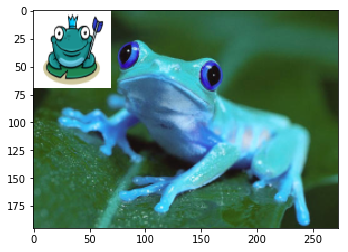

In [105]:
import cv2

image1 = cv2.imread("temp/opencvs/frog_logo.png")

row, col, channel = image1.shape

image1 = cv2.resize(image1, (70, 70))

image2 = cv2.imread("temp/opencvs/frog.png")

row, col, channel = image1.shape

image2[0:row, 0:col] = image1

import matplotlib.pyplot as plt

plt.imshow(image2)

#### 图像高级融合

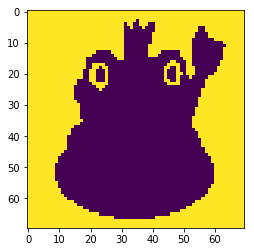

In [107]:
import cv2
import numpy as np

img1 = cv2.imread("./temp/opencvs/frog.png")  # 读取图片img1
img2 = cv2.imread("./temp/opencvs/frog_logo.png")  # 读取图片img2
img2 = cv2.resize(img2, (70, 70))  # 缩小img2的图片尺寸，使用双线性插值法


rows, cols, channels = img2.shape
roi = img1[0:rows, 0:cols, 0:channels]  # 获取img1中感兴趣区域

img2gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)  # 获取灰度图，方便得到掩码

ret,mask = cv2.threshold(img2gray, 245, 255, cv2.THRESH_BINARY)  # 创建的掩码,<245 == 0，>245 == 255
# """
# cv2.threshhold()。这个函数的第一个参数就是原图像，原图像应该是灰度图。第二个参数就是用来对像素值进行分类的阈值。第三个参数就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值。
# - cv2.THRESH_BINARY
# - cv2.THRESH_BINARY_INV
# - cv2.THRESH_TRUNC
# - cv2.THRESH_TOZERO
# - cv2.THRESH_TOZERO_INV
# """

# mask_inv = cv2.bitwise_not(mask)  # 通过反转上面的图像创建掩码

# img1_bg = cv2.bitwise_and(roi, img2, mask=mask)  
# """
# cv2.bitwise_and()是对二进制数据进行“与”操作，即对图像（灰度图像或彩色图像均可）每个像素值进行二进制“与”操作
# 利用掩膜（mask）进行“与”操作，即掩膜图像白色区域是对需要处理图像像素的保留，黑色区域是对需要处理图像像素的剔除
# """

# img2_fg = cv2.bitwise_and(img2, img2, mask=mask_inv) # 仅仅显示logo

# dst2 = cv2.add(img1_bg, img2_fg)
# img1[0:rows, 0:cols] = dst2
# # cv2.imshow("senior", img1)
# # cv2.waitKey(0)
plt.imshow(mask)

#### 颜色物体分割